In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
train_df = pd.read_csv("../data/processed/train_processed.csv")
test_df = pd.read_csv("../data/processed/test_processed.csv")

X_train = train_df.drop(columns=["subject", "activity_id", "activity"])
y_train = train_df["activity"]

X_test = test_df.drop(columns=["subject", "activity_id", "activity"])
y_test = test_df["activity"]

In [22]:
# Modelo base
model = LogisticRegression(max_iter=10, solver="lbfgs")

# Exemplo: selecionar 30 melhores features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Número de features selecionadas:", rfe.n_features_)
print("Features selecionadas:", list(X_train.columns[rfe.support_]))

/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

Número de features selecionadas: 5
Features selecionadas: ['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'fBodyAcc-std()-X', 'fBodyAccJerk-std()-X', 'fBodyAccMag-mean()']


/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.

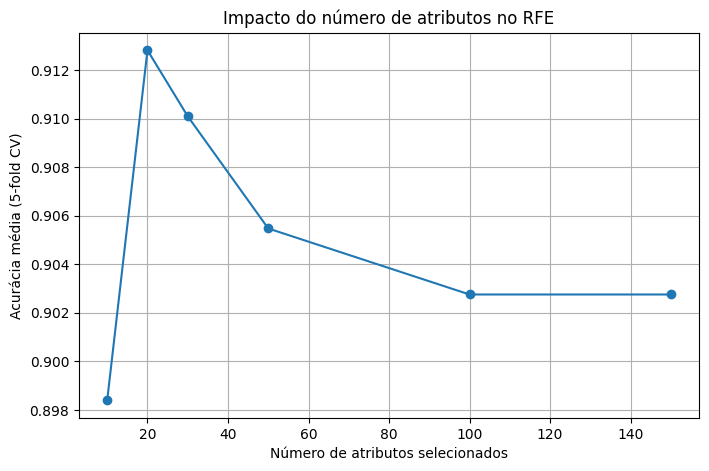

In [15]:
scores = []
n_features_range = [10, 20, 30, 50, 100, 150]  # você pode variar mais

for n in n_features_range:
    rfe = RFE(estimator=model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    score = cross_val_score(model, X_train_rfe, y_train, cv=5).mean()
    scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(n_features_range, scores, marker="o")
plt.xlabel("Número de atributos selecionados")
plt.ylabel("Acurácia média (5-fold CV)")
plt.title("Impacto do número de atributos no RFE")
plt.grid(True)
plt.show()

In [25]:
# Definir número ótimo (exemplo: 50)
best_n = 50
rfe_final = RFE(estimator=model, n_features_to_select=best_n)
rfe_final.fit(X_train, y_train)

selected_features_rfe = list(X_train.columns[rfe_final.support_])
print("Features escolhidas pelo RFE:", selected_features_rfe)

/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/

Features escolhidas pelo RFE: ['tBodyAcc-mean()-X', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-std()-X', 'tGravityAcc-std()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z', 'tBodyGyro-mean()-X', 'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z', 'tBodyGyroJerk-std()-X', 'tBodyGyroJerk-std()-Y', 'tBodyGyroJerk-std()-Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()', 'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()', 'tBodyGyroMag-mean()', 'tBodyGyroJerkMag-mean()', 'tBodyGyroJerkMag-std()', 'fBodyAcc-mean()-X', 'fBodyAcc-std()-X', 'fBodyAcc-std()-Y', 'fBodyAcc-std()-Z', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z', 'fBodyAccJerk-std()-X', 'fBodyAccJerk-std()-Y', 'fBodyAccJerk-std()-Z', 'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z', 'fBodyGyro-std()-X', 'fBodyGyro-std()-Y', 'fBodyGy

/home/lucaspm5/har_project/scripts/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 50 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=50).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
